In [1]:
import pandas as pd

In [40]:
df = pd.read_csv("D:/Documents/10/тест/Tablica_LS.csv")
df.head()

,ИД дома,ИД подъезда,ИД квартиры,Лицевой счет (ЛС),Услуга,Ставка тарифа,Статус услуги,Дата начала услуги
0,100,1624,43036,43036,ТО МКД,5.2,Активна,23.01.2008
1,100,1624,43037,43037,ТО МКД,5.4,Активна,23.01.2008
2,100,1624,43038,43038,ТО МКД,5.2,Активна,23.01.2008
3,100,1624,43039,43039,ТО МКД,5.2,Активна,23.01.2008
4,100,1624,43040,43040,ТО МКД,5.2,Активна,23.01.2008


загрузим и изучим таблицу

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49543 entries, 0 to 49542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ИД дома             49543 non-null  int64  
 1   ИД подъезда         49543 non-null  int64  
 2   ИД квартиры         49543 non-null  int64  
 3   Лицевой счет (ЛС)   49543 non-null  int64  
 4   Услуга              49543 non-null  object 
 5   Ставка тарифа       49316 non-null  float64
 6   Статус услуги       49543 non-null  object 
 7   Дата начала услуги  49543 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 3.0+ MB


проверим таблицу на дубликаты

In [42]:
df.duplicated(keep=False)

0        False
1        False
2        False
3        False
4        False
         ...  
49538    False
49539    False
49540    False
49541    False
49542    False
Length: 49543, dtype: bool

дубликатов не обнаружено. Однако данные в столбце "дата начала услуги" нужно привести в удобный формат

In [43]:
df['Дата начала услуги'] = pd.to_datetime(df['Дата начала услуги'],format='%d.%m.%Y')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49543 entries, 0 to 49542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ИД дома             49543 non-null  int64         
 1   ИД подъезда         49543 non-null  int64         
 2   ИД квартиры         49543 non-null  int64         
 3   Лицевой счет (ЛС)   49543 non-null  int64         
 4   Услуга              49543 non-null  object        
 5   Ставка тарифа       49316 non-null  float64       
 6   Статус услуги       49543 non-null  object        
 7   Дата начала услуги  49543 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 3.0+ MB


посмотрим на таблицу платежей

In [98]:
df1 = pd.read_csv("D:/Documents/10/тест/Tablica_plat.csv")
df1.head()

,ЛС,Сумма платежа,Дата загрузки,Источник платежа,способ оплаты,Комментарий к платежу
0,1,"4,8",4/16/2019,Ручной ввод,Офис,NaN
1,1,"14,4",10/17/2018,Ввод из реестра,Сбербанк России,NaN
2,1,"14,4",1/21/2019,Ввод из реестра,КС банк,NaN
3,1,"32,4",12/11/2020,Ввод из реестра,КС банк,NaN
4,1,"56,4",2/9/2018,Ввод из реестра,КС банк,NaN


In [99]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356846 entries, 0 to 356845
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   ЛС                     356846 non-null  int64 
 1   Сумма платежа          356846 non-null  object
 2   Дата загрузки          356846 non-null  object
 3   Источник платежа       356846 non-null  object
 4   способ оплаты          356846 non-null  object
 5   Комментарий к платежу  5876 non-null    object
dtypes: int64(1), object(5)
memory usage: 16.3+ MB


данные в "сумме платежа" и в "дате загрузки" нужно привести к удобному формату

но предварительно нужно именить запятую на точку в "Сумме платежа"

In [100]:
df1['Сумма платежа'] = df1['Сумма платежа'].str.replace(',', '.')

In [101]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356846 entries, 0 to 356845
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   ЛС                     356846 non-null  int64 
 1   Сумма платежа          356846 non-null  object
 2   Дата загрузки          356846 non-null  object
 3   Источник платежа       356846 non-null  object
 4   способ оплаты          356846 non-null  object
 5   Комментарий к платежу  5876 non-null    object
dtypes: int64(1), object(5)
memory usage: 16.3+ MB


In [102]:
df1.head()

,ЛС,Сумма платежа,Дата загрузки,Источник платежа,способ оплаты,Комментарий к платежу
0,1,4.8,4/16/2019,Ручной ввод,Офис,NaN
1,1,14.4,10/17/2018,Ввод из реестра,Сбербанк России,NaN
2,1,14.4,1/21/2019,Ввод из реестра,КС банк,NaN
3,1,32.4,12/11/2020,Ввод из реестра,КС банк,NaN
4,1,56.4,2/9/2018,Ввод из реестра,КС банк,NaN


In [103]:
df1['Сумма платежа'] = pd.to_numeric(df1['Сумма платежа'])

In [104]:
df1['Дата загрузки'] = pd.to_datetime(df1['Дата загрузки'],  format='%m/%d/%Y')

Рассчитаем для каждого ЛС сумму всех поступивших платежей с учетом возвратов, но исключая списания

Рассчитаем для каждого ЛС плановую выручку с учетом дат начала услуг на ЛС и ставки тарифа

In [79]:
import datetime
current_date = datetime.datetime.now() # получить текущую дату и время

df['Плановая выручка'] = df.apply(lambda row: row['Ставка тарифа'] * (current_date - row['Дата начала услуги']).days, axis=1)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49543 entries, 0 to 49542
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ИД дома             49543 non-null  int64         
 1   ИД подъезда         49543 non-null  int64         
 2   ИД квартиры         49543 non-null  int64         
 3   Лицевой счет (ЛС)   49543 non-null  int64         
 4   Услуга              49543 non-null  object        
 5   Ставка тарифа       49316 non-null  float64       
 6   Статус услуги       49543 non-null  object        
 7   Дата начала услуги  49543 non-null  datetime64[ns]
 8   Плановая выручка    49316 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 3.4+ MB


In [81]:
df.head()


,ИД дома,ИД подъезда,ИД квартиры,Лицевой счет (ЛС),Услуга,Ставка тарифа,Статус услуги,Дата начала услуги,Плановая выручка
0,100,1624,43036,43036,ТО МКД,5.2,Активна,2008-01-23,30596.8
1,100,1624,43037,43037,ТО МКД,5.4,Активна,2008-01-23,31773.6
2,100,1624,43038,43038,ТО МКД,5.2,Активна,2008-01-23,30596.8
3,100,1624,43039,43039,ТО МКД,5.2,Активна,2008-01-23,30596.8
4,100,1624,43040,43040,ТО МКД,5.2,Активна,2008-01-23,30596.8


Рассчитаем для каждого ЛС сальдо: плановая выручка (п. 3) минус сумма платежей (из п. 2).    

Предваритаельно нужно привести данные в столбцах к числовому формату

In [82]:
df1['Сумма платежа'] = pd.to_numeric(df1['Сумма платежа'], errors='coerce')
df['Плановая выручка'] = pd.to_numeric(df['Плановая выручка'], errors='coerce')

Теперь можно рассчитать сальдо

In [84]:
df_merged = pd.merge(df, df1, left_on='Лицевой счет (ЛС)', right_on='ЛС', how='left')

df_merged['Сальдо'] = df_merged['Плановая выручка'] - df_merged['Сумма платежа']

In [85]:
print (df_merged)

        ИД дома  ИД подъезда  ИД квартиры  Лицевой счет (ЛС)  Услуга  \
0           100         1624        43036              43036  ТО МКД   
1           100         1624        43036              43036  ТО МКД   
2           100         1624        43036              43036  ТО МКД   
3           100         1624        43036              43036  ТО МКД   
4           100         1624        43037              43037  ТО МКД   
...         ...          ...          ...                ...     ...   
415907     5219         1884        49535              49075  ТО МКД   
415908     5219         1884        49535              49075  ТО МКД   
415909     5219         1884        49535              49075  ТО МКД   
415910     5219         1884        49535              49075  ТО МКД   
415911     5219         1884        49535              49075  ТО МКД   

        Ставка тарифа Статус услуги Дата начала услуги  Плановая выручка  \
0                 5.2       Активна         2008-01-23     

посмотрим на новвю таблицу

In [86]:
df_merged.to_csv('C:/Users/USER/saldo_table.csv', index=False)

In [87]:
df3 = pd.read_csv('C:/Users/USER/saldo_table.csv')

In [88]:
df3.head()

,ИД дома,ИД подъезда,ИД квартиры,Лицевой счет (ЛС),Услуга,Ставка тарифа,Статус услуги,Дата начала услуги,Плановая выручка,ЛС,Сумма платежа,Дата загрузки,Источник платежа,способ оплаты,Комментарий к платежу,Сальдо
0,100,1624,43036,43036,ТО МКД,5.2,Активна,2008-01-23,30596.8,43036.0,56.4,2018-03-02,Ввод из реестра,КС банк,NaN,30540.4
1,100,1624,43036,43036,ТО МКД,5.2,Активна,2008-01-23,30596.8,43036.0,57.6,2019-02-15,Ввод из реестра,КС банк,NaN,30539.2
2,100,1624,43036,43036,ТО МКД,5.2,Активна,2008-01-23,30596.8,43036.0,60.0,2019-12-18,Ввод из реестра,КС банк,NaN,30536.8
3,100,1624,43036,43036,ТО МКД,5.2,Активна,2008-01-23,30596.8,43036.0,62.4,2020-12-08,Ввод из реестра,Сбербанк России,NaN,30534.4
4,100,1624,43037,43037,ТО МКД,5.4,Активна,2008-01-23,31773.6,43037.0,14.4,2019-05-06,Ввод из реестра,Сбербанк России,NaN,31759.2


Чтобы рассчитать для каждой квартиры частоту платежей и количество оплаченных тарифов а календарный год нужно еще раз подготовить данные.

для дальнейшей работы переименую столбец ЛС в "Лицевой счет" в таблице Лицевых счетов

In [ ]:
df.rename(columns={'Лицевой счет (ЛС)': 'Лицевой счет'}, inplace=True)

Приводим данные в столбцах 'Дата начала услуги' и 'Дата загрузки' к формату datetime

In [ ]:
df1 = pd.read_csv("C:/Users/admin/Desktop/тест/Tablica_plat.csv")

In [ ]:
df1['Дата загрузки'] = pd.to_datetime(df_2['Дата загрузки'])

и для дальнейшей работы нужно переименовать столбец ЛС в "Лицевой счет" в этой таблице

Объединяем таблицы по столбцу 'Лицевой счет'

In [ ]:
merged_df = pd.merge(df, df3, on='Лицевой счет')

Сгруппируем данные по 'ИД квартиры' и считаем частоту платежей и количество оплаченных тарифов за календарный год

In [ ]:
result = merged_df.groupby('ИД квартиры').agg({'Сумма платежа': 'count', 'Дата начала услуги': 'nunique'})

In [ ]:
print(result)

В качестве других метрик для анализа платежной дисциплины абонентов за услуги я предлагаю разделить абонентов
на тех кто платит в начале месяца и в конце месяца.
Эта метрика может указывать на дисциплинированность абонетов. Можно применить такой код


In [117]:
df4 = pd.read_csv("C:/Users/USER/table_plat2.csv")

In [118]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356846 entries, 0 to 356845
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ЛС                     356846 non-null  int64  
 1   Сумма платежа          356846 non-null  float64
 2   Дата загрузки          356846 non-null  object 
 3   Источник платежа       356846 non-null  object 
 4   способ оплаты          356846 non-null  object 
 5   Комментарий к платежу  5876 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 16.3+ MB


In [121]:
df4.head()

,ЛС,Сумма платежа,Дата загрузки,Источник платежа,способ оплаты,Комментарий к платежу
0,1,4.8,2019-04-16,Ручной ввод,Офис,NaN
1,1,14.4,2018-10-17,Ввод из реестра,Сбербанк России,NaN
2,1,14.4,2019-01-21,Ввод из реестра,КС банк,NaN
3,1,32.4,2020-12-11,Ввод из реестра,КС банк,NaN
4,1,56.4,2018-02-09,Ввод из реестра,КС банк,NaN


In [133]:
# Создать новый столбец "Категория оплаты"
df4['Категория оплаты'] = ''
# Используя формулу или скрипт в этом новом столбце, определить категорию оплаты для каждой строки, основываясь на датах загрузки.

df4.loc[df4['Дата загрузки'].dt.day.between(1, 5), 'категория оплаты'] = 'начало месяца'
df4.loc[df4['Дата загрузки'].dt.day.between(20, 31), 'категория оплаты'] = 'конец месяца'
#далее сгруппировать абонентов по по категориям "конец месяца" и "начало месяца".
grouped_df4 = df4.groupby('Категория оплаты').agg({'ЛС': 'count'})


In [134]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356846 entries, 0 to 356845
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ЛС                     356846 non-null  int64         
 1   Сумма платежа          356846 non-null  float64       
 2   Дата загрузки          356846 non-null  datetime64[ns]
 3   Источник платежа       356846 non-null  object        
 4   способ оплаты          356846 non-null  object        
 5   Комментарий к платежу  5876 non-null    object        
 6   Категория оплаты       356846 non-null  object        
 7   категория оплаты       208274 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 21.8+ MB


In [137]:
df4.head(30)

,ЛС,Сумма платежа,Дата загрузки,Источник платежа,способ оплаты,Комментарий к платежу,Категория оплаты,категория оплаты
0,1,4.800,2019-04-16,Ручной ввод,Офис,NaN,,NaN
1,1,14.400,2018-10-17,Ввод из реестра,Сбербанк России,NaN,,NaN
2,1,14.400,2019-01-21,Ввод из реестра,КС банк,NaN,,конец месяца
3,1,32.400,2020-12-11,Ввод из реестра,КС банк,NaN,,NaN
4,1,56.400,2018-02-09,Ввод из реестра,КС банк,NaN,,NaN
5,1,60.000,2020-01-16,Ручной ввод,КС банк,Беговатов ВВ,,NaN
6,2,-167.500,2020-03-31,Возврат,Сайт ЦС,ошибочные платежи с сайта,,конец месяца
7,2,-144.000,2020-03-31,Возврат,Сайт ЦС,ошибочные платежи с сайта,,конец месяца
8,2,-108.000,2020-03-31,Возврат,Сайт ЦС,ошибочные платежи с сайта,,конец месяца
9,2,-108.000,2020-03-31,Возврат,Сайт ЦС,ошибочные платежи с сайта,,конец месяца


In [143]:
count_end_of_month = len(df4[df4['категория оплаты'] == 'конец месяца'])
print(f'Количество раз, когда "конец месяца" встречается в колонке "категория оплаты": {count_end_of_month}')
count_start_of_month = len(df4[df4['категория оплаты'] == 'начало месяца'])
print(f'Количество раз, когда "начало месяца" встречается в колонке "категория оплаты": {count_start_of_month}')

Количество раз, когда "конец месяца" встречается в колонке "категория оплаты": 183431
Количество раз, когда "начало месяца" встречается в колонке "категория оплаты": 24843


Визуализируем метрику сальдо

In [7]:
import pandas as pd

In [8]:
data = pd.read_csv('C:/Users/USER/saldo_table.csv')

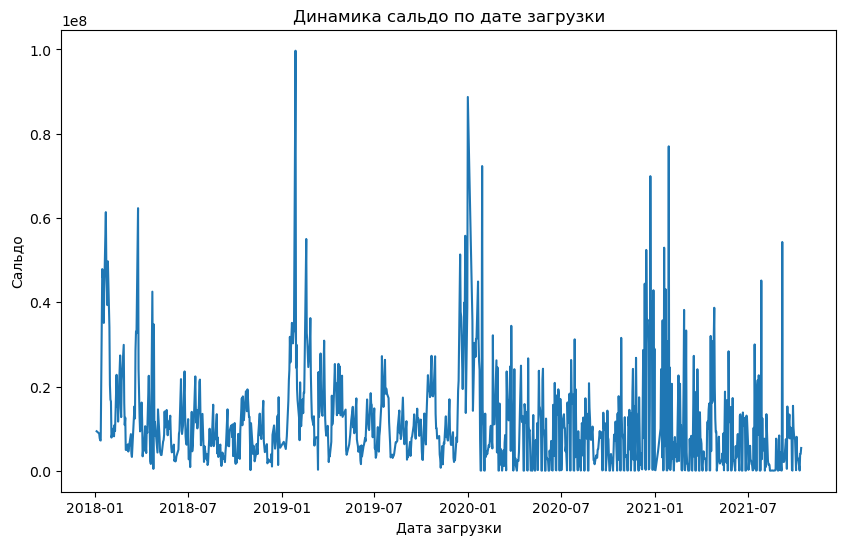

In [9]:
import matplotlib.pyplot as plt

data['Дата загрузки'] = pd.to_datetime(data['Дата загрузки'])
data['Сальдо'] = data['Плановая выручка'] - data['Сумма платежа']
daily_saldo = data.groupby('Дата загрузки')['Сальдо'].sum()
plt.figure(figsize=(10,6))
plt.plot(daily_saldo.index, daily_saldo.values)
plt.xlabel('Дата загрузки')
plt.ylabel('Сальдо')
plt.title('Динамика сальдо по дате загрузки')


plt.show()